In [1]:
# Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
pronostico = pd.read_csv("weatherAUS.csv")

In [3]:
pronostico.info() # 145460

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

1- Date: La fecha en la que se registró.

2- Location: La ciudad en Australia.

3- MinTemp: Temperatura mínima registrada ese día (en grados).

4- MaxTemp: Temperatura máxima registrada ese día (en grados).

5- Rainfall: Cantidad de lluvia registrada ese día (en mm).

6- Evaporation: Cantidad de agua evaporada ese día (en mm).

7- Sunshine: Número de horas de sol.

8- WindGustDir: Dirección del viento durante la ráfaga más fuerte.

9- WindGustSpeed: Velocidad de la ráfaga de viento más fuerte (en km/h).

10- WindDir9am: Dirección del viento a las 9 de la mañana.

11- WindDir3pm: Dirección del viento a las 3 de la tarde.

12- WindSpeed9am: Velocidad del viento a las 9 de la mañana (en km/h).

13- WindSpeed3pm: Velocidad del viento a las 3 de la tarde (en km/h).

14- Humidity9am: Porcentaje de humedad relativa a las 9 de la mañana (en %).

15- Humidity3pm: Porcentaje de humedad relativa a las 3 de la tarde (en %).

16- Pressure9am: Presión atmosférica a las 9 de la mañana (en hPa).

17- Pressure3pm: Presión atmosférica a las 3 de la tarde (en hPa).

18- Cloud9am: Cobertura de nubes a las 9 de la mañana (en oktas, de 0 a 8).

19- Cloud3pm: Cobertura de nubes a las 3 de la tarde (en oktas, de 0 a 8).

20- Temp9am: Temperatura a las 9 de la mañana (en grados).

21- Temp3pm: Temperatura a las 3 de la tarde (en grados).

22- RainToday: Indica si llovió hoy.

23- RainTomorrow: Variable objetivo que indica si lloverá al día siguiente.

In [4]:
pronostico["Date"] = pd.to_datetime(pronostico["Date"])

### Creacion de columnas nuevas

#### Creacion de columnas de tiempo

In [5]:
pronostico["dia"] = pronostico["Date"].dt.day
pronostico["mes"] = pronostico["Date"].dt.month
pronostico["año"] = pronostico["Date"].dt.year

#### Creacion de regiones

##### Grafico de las ciudades

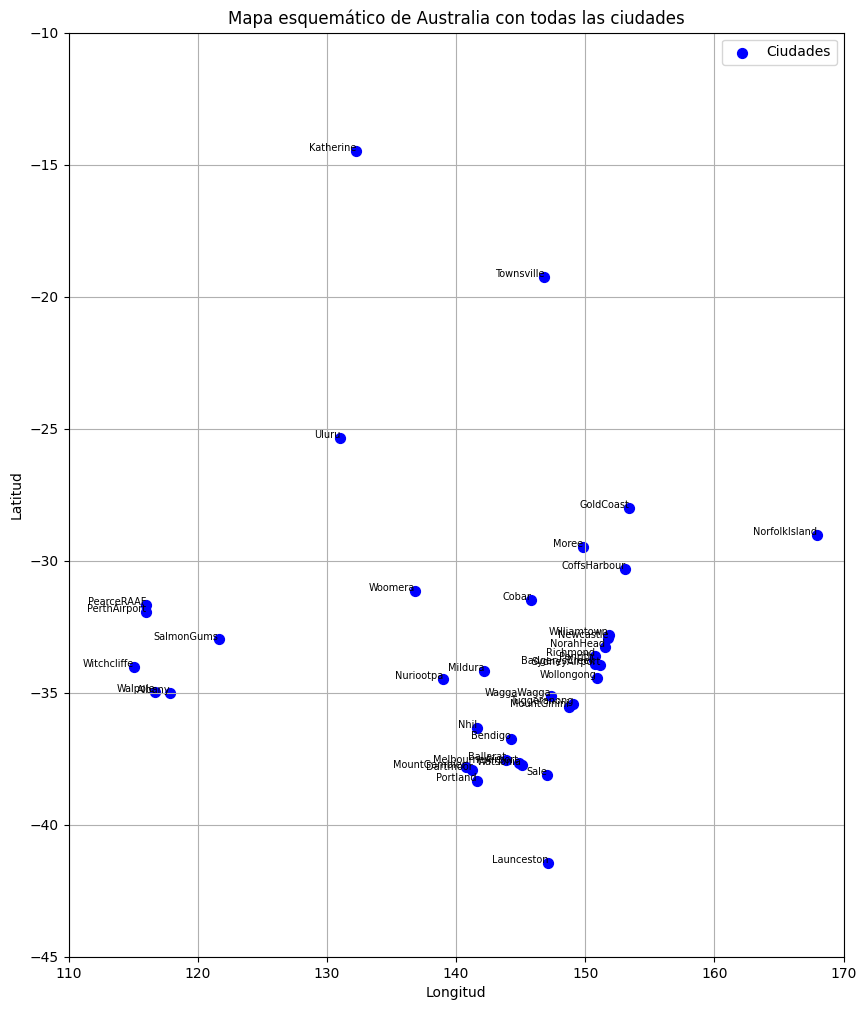

In [6]:
# Diccionario extendido con coordenadas aproximadas (algunas pueden ser estimadas)
city_coords = {
    'BadgerysCreek': (-33.92, 150.78),
    'Cobar': (-31.50, 145.83),
    'CoffsHarbour': (-30.30, 153.11),
    'Moree': (-29.47, 149.84),
    'Newcastle': (-32.93, 151.78),
    'NorahHead': (-33.28, 151.57),
    'NorfolkIsland': (-29.04, 167.95),
    'Penrith': (-33.75, 150.69),
    'Richmond': (-33.60, 150.75),
    'SydneyAirport': (-33.94, 151.18),
    'WaggaWagga': (-35.11, 147.37),
    'Williamtown': (-32.80, 151.84),
    'Wollongong': (-34.43, 150.89),
    'Tuggeranong': (-35.42, 149.07),
    'MountGinini': (-35.53, 148.77),
    'Ballarat': (-37.56, 143.85),
    'Bendigo': (-36.76, 144.28),
    'Sale': (-38.11, 147.07),
    'MelbourneAirport': (-37.67, 144.84),
    'Mildura': (-34.19, 142.16),
    'Nhil': (-36.33, 141.65),
    'Portland': (-38.34, 141.60),
    'Watsonia': (-37.72, 145.08),
    'Dartmoor': (-37.92, 141.27),
    'GoldCoast': (-28.00, 153.43),
    'Townsville': (-19.26, 146.82),
    'MountGambier': (-37.83, 140.78),
    'Nuriootpa': (-34.47, 138.99),
    'Woomera': (-31.15, 136.80),
    'Albany': (-35.02, 117.88),
    'Witchcliffe': (-34.01, 115.10),
    'PearceRAAF': (-31.67, 116.02),
    'PerthAirport': (-31.94, 115.97),
    'SalmonGums': (-32.98, 121.63),
    'Walpole': (-34.98, 116.73),
    'Launceston': (-41.44, 147.14),
    'Katherine': (-14.47, 132.26),
    'Uluru': (-25.34, 131.03)
}

plt.figure(figsize=(10, 12))
plt.scatter(
    [lon for lat, lon in city_coords.values()],
    [lat for lat, lon in city_coords.values()],
    s=50, c='blue', label='Ciudades'
)
for city, (lat, lon) in city_coords.items():
    plt.text(lon, lat, city, fontsize=7, ha='right')

plt.title('Mapa esquemático de Australia con todas las ciudades')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.xlim(110, 170)
plt.ylim(-45, -10)
plt.grid(True)
plt.legend()
plt.show()

##### Agrupamos por ciudades

In [7]:
region_dict = {
    'New South Wales': [
        'Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
        'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
        'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong'
    ],
    'Australian Capital Territory': [
        'Canberra', 'Tuggeranong', 'MountGinini'
    ],
    'Victoria': [
        'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne',
        'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor'
    ],
    'Queensland': [
        'Brisbane', 'Cairns', 'GoldCoast', 'Townsville'
    ],
    'South Australia': [
        'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera'
    ],
    'Western Australia': [
        'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth',
        'SalmonGums', 'Walpole'
    ],
    'Tasmania': [
        'Hobart', 'Launceston'
    ],
    'Northern Territory': [
        'AliceSprings', 'Darwin', 'Katherine', 'Uluru'
    ]
}

def asignar_region(ciudad):
    for region, ciudades in region_dict.items():
        if ciudad in ciudades:
            return region
    return 'Other'

pronostico['Region'] = pronostico['Location'].apply(asignar_region)

## Analisis descriptivo

In [8]:
# Verificamos que no haya nulos en la columna RainTomorrow.
print(f"{pronostico["RainTomorrow"].isna().sum()} nulos en nuestra columna objetivo")

#Eliminamos los nulos
pronostico = pronostico.dropna(subset=["RainTomorrow"])

3267 nulos en nuestra columna objetivo


### Division del dataset

In [9]:
# Eliminamos las columnas Date y RainTomorrow, una es la que vamos a predecir y la otra es la no nos sirve para el modelo.
X = pronostico.drop(labels =['Date','RainTomorrow'], axis = 1)
y = pronostico['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Graficos

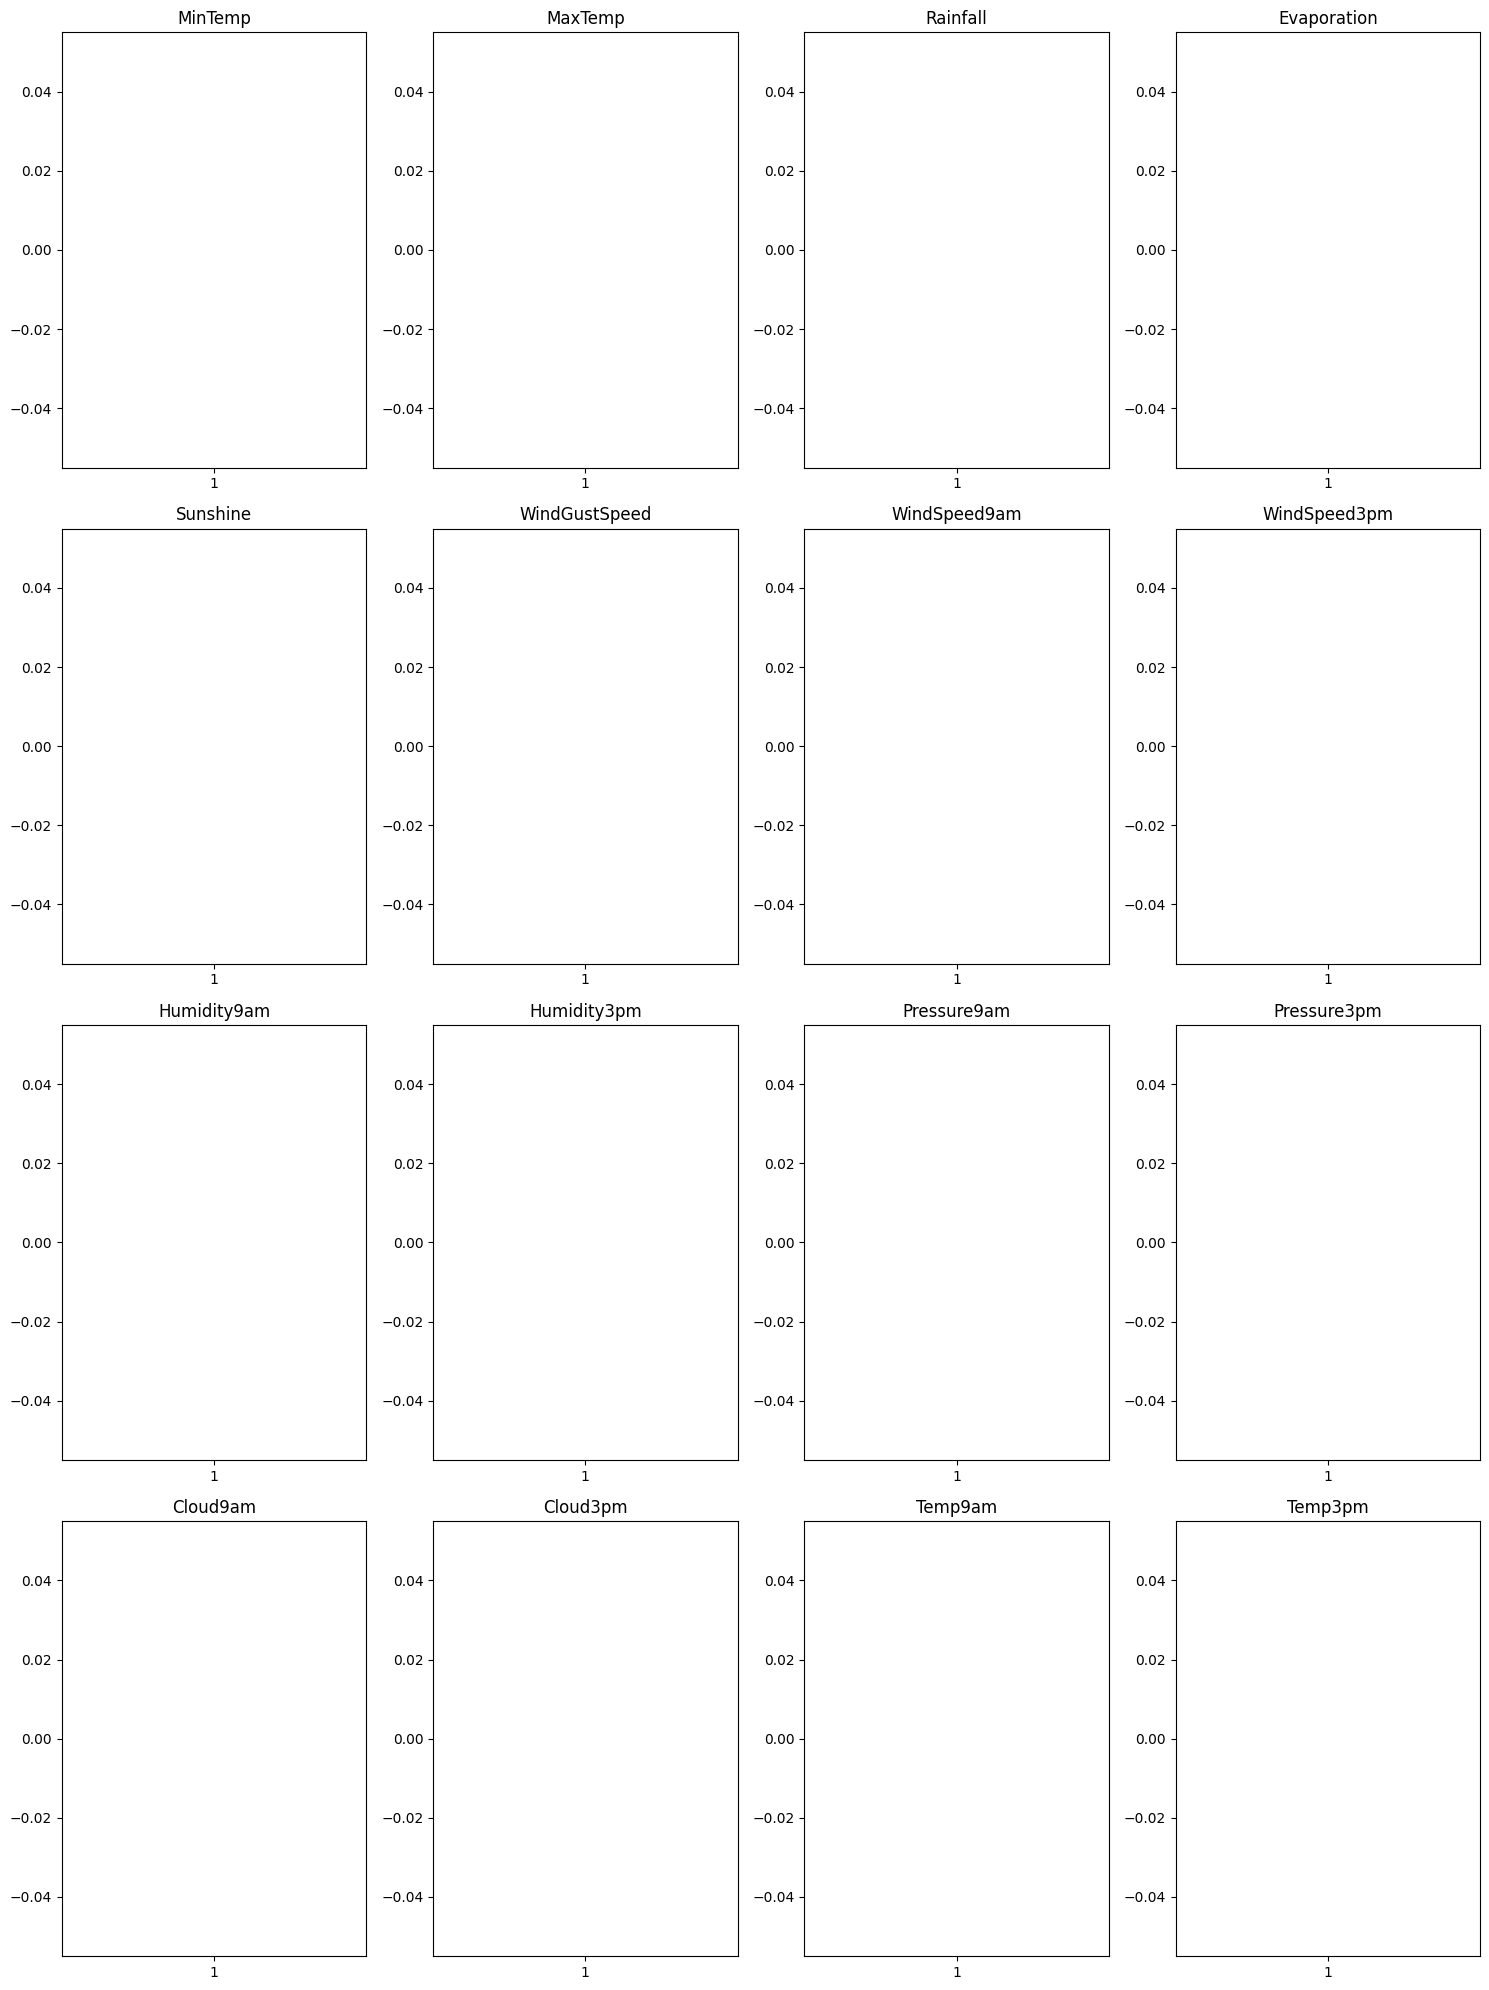

In [10]:
# Obtenemos las columnas numericos
numericas = list(X_train.select_dtypes(include=['float64', 'int64']).columns)

# Graficamos los boxplot de las columnas numericas
fig, axis = plt.subplots(4, 4, figsize=(15, 20))

# Aplanamos la matriz de subgráficos para facilitar el acceso
axis = axis.flatten()

# Iteramos sobre las columnas numéricas y los subgráficos
for i, columans in enumerate(numericas):
    axis[i].boxplot(X_train[columans])
    axis[i].set_title(columans)

plt.tight_layout()
plt.show()

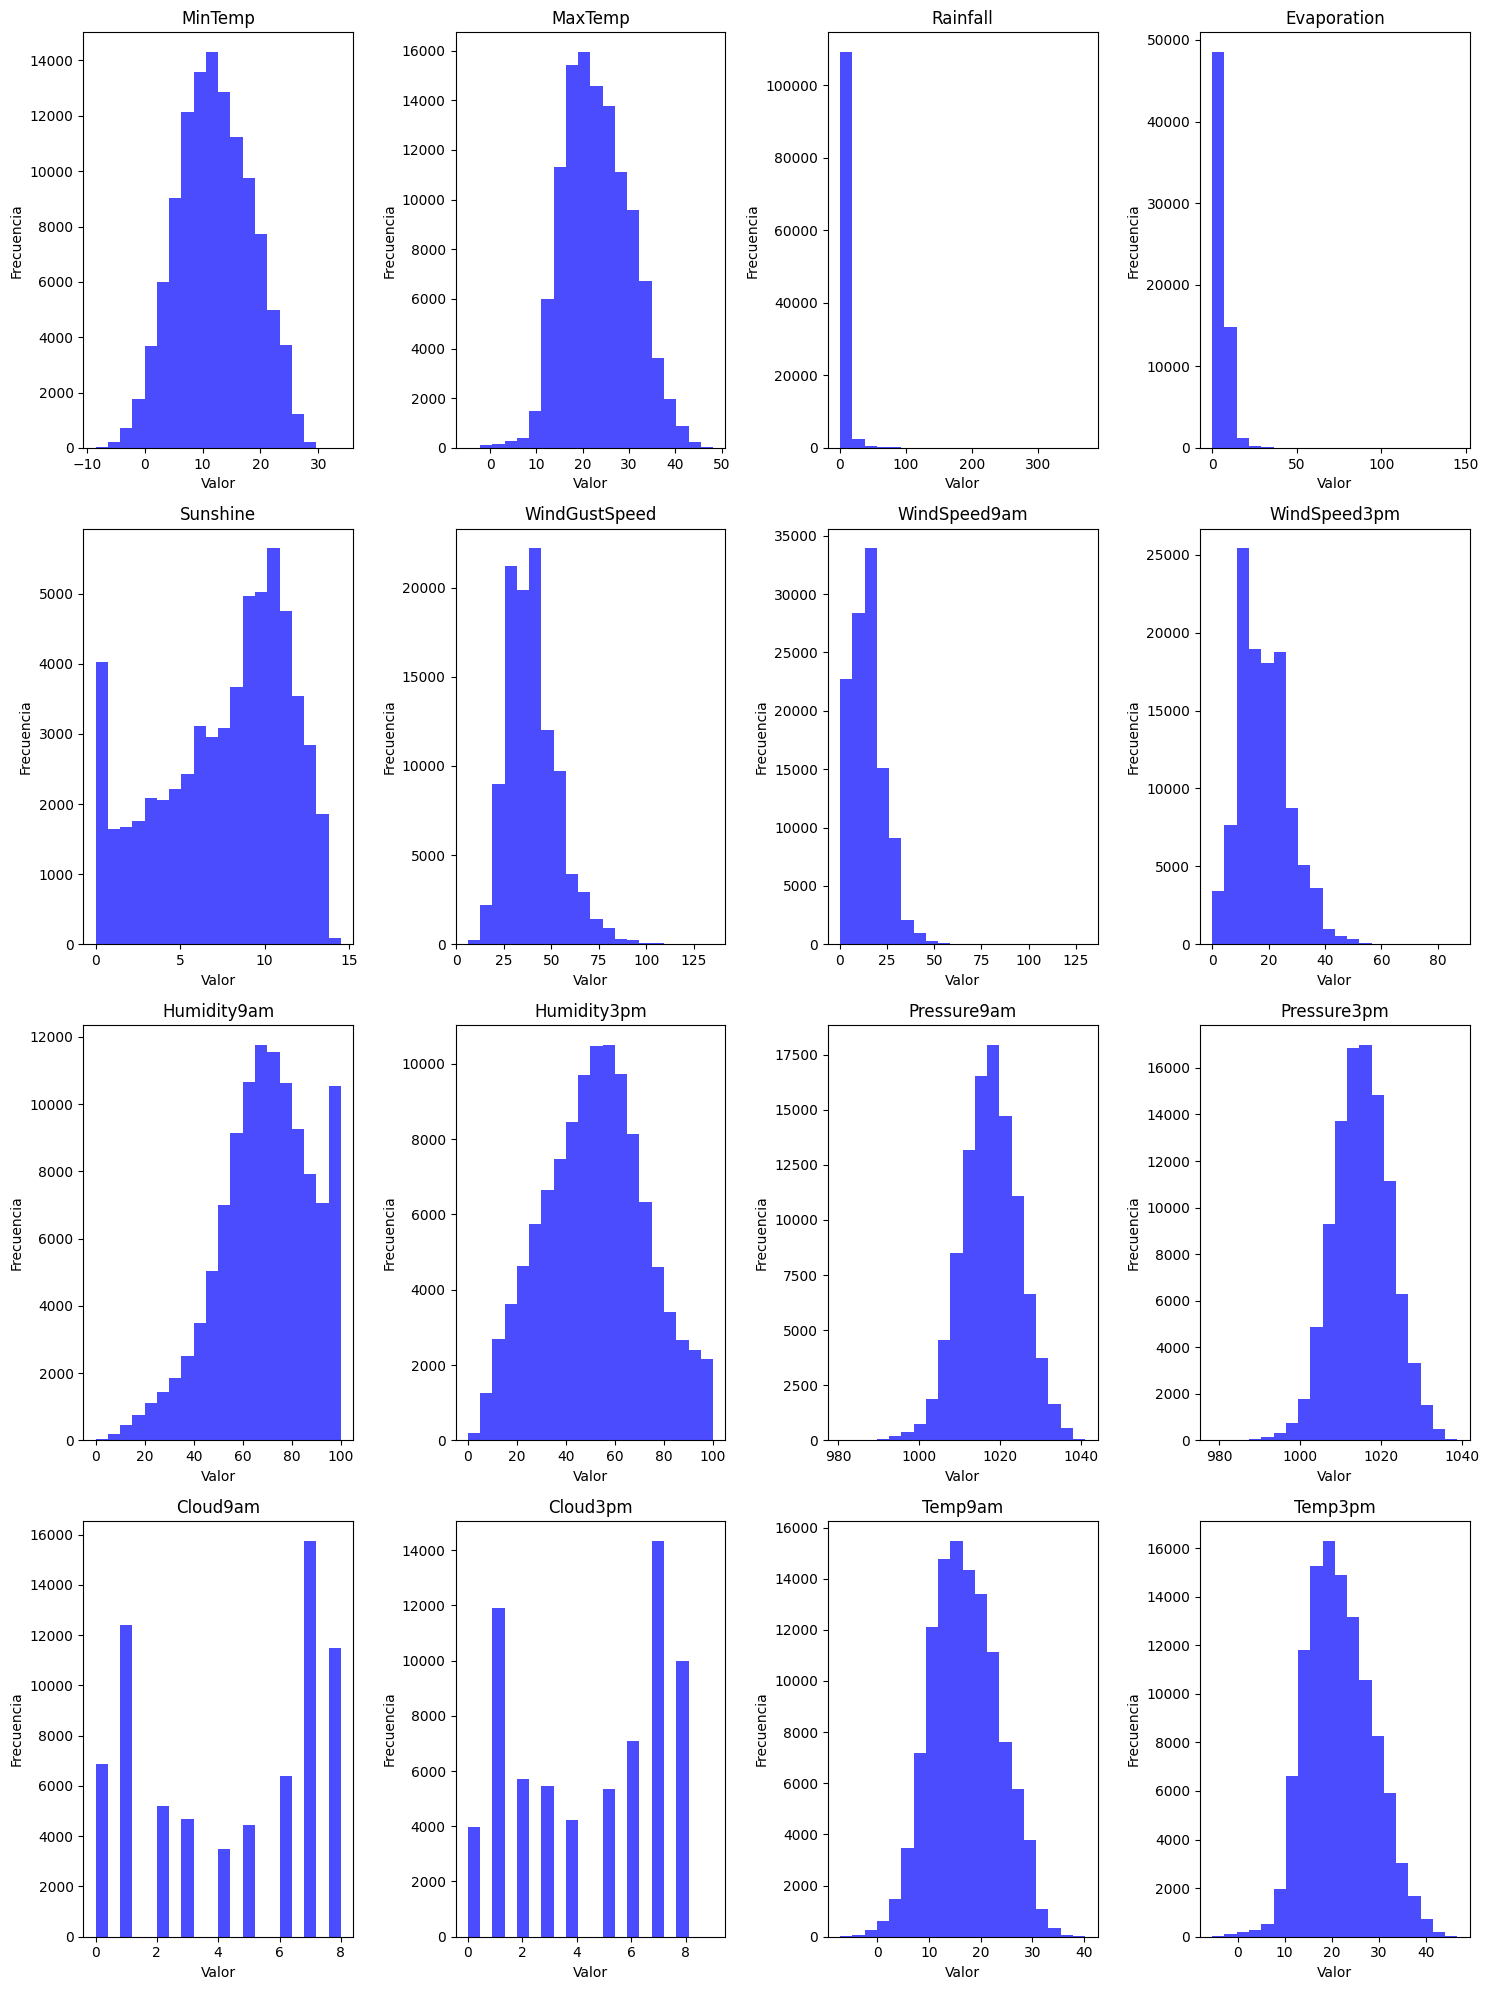

In [11]:
# histograma

fig, axis = plt.subplots(4, 4, figsize=(15, 20))

# Aplanamos la matriz de subgráficos para facilitar el acceso
axis = axis.flatten()

# Iteramos sobre las columnas numéricas y los subgráficos

for i, columans in enumerate(numericas):
    axis[i].hist(X_train[columans], bins=20, color='blue', alpha=0.7)
    axis[i].set_title(columans)
    axis[i].set_xlabel('Valor')
    axis[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

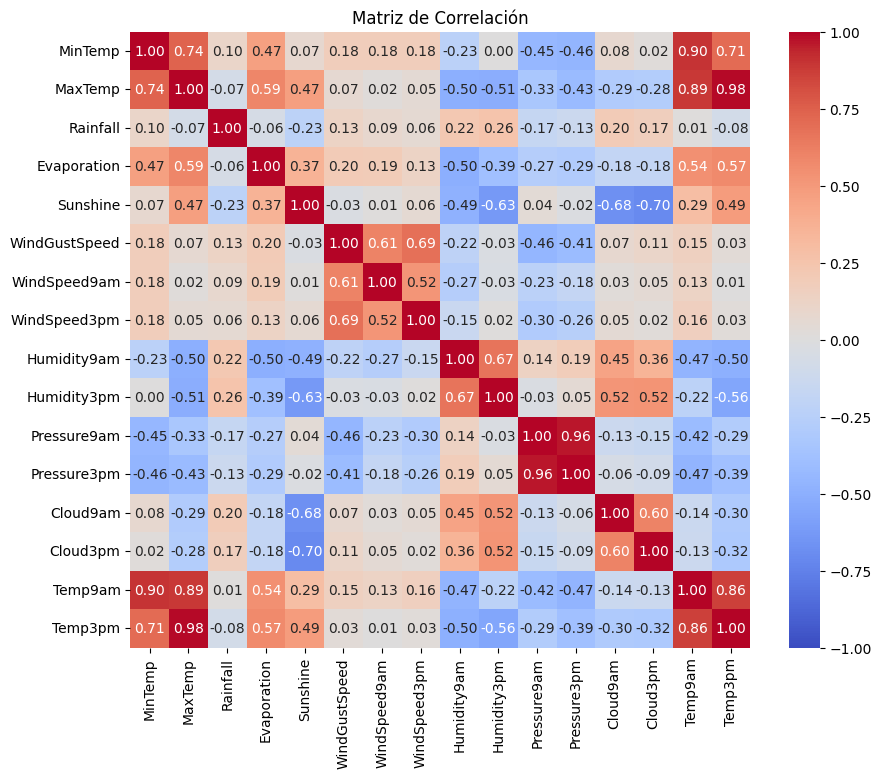

In [12]:
# Matriz de correlacion

correlacion = X_train[numericas].corr()

# Visualizamos la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

### Valores nulos

In [13]:
def rellenar_nulos_numericos(df: pd.DataFrame) -> pd.DataFrame:
    """
    Rellena los valores nulos numericos del dataframe con la mediana de la columna, por mes y región.
    Args:
        df (pd.DataFrame): DataFrame con los datos meteorológicos.
    Returns:
        pd.DataFrame: DataFrame con los valores nulos rellenados.
    """

    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        # Rellenar los valores nulos con la mediana de la columna
        df[col] = df.groupby(['mes', 'Region'])[col].transform(lambda x: x.fillna(x.median()))

    return df

In [14]:
def rellenar_nulos_categoricos(df: pd.DataFrame) -> pd.DataFrame:
    """
    Rellena los valores nulos categoricos del dataframe con la moda de la columna, por mes y por region.
    Args:
        df (pd.DataFrame): DataFrame con los datos meteorológicos.
    Returns:
        pd.DataFrame: DataFrame con los valores nulos rellenados.
    """
    
    for col in df.select_dtypes(include=['object']).columns:
        # Rellenar los valores nulos con la moda de la columna
        df[col] = df.groupby(['mes','Region'])[col].transform(lambda x: x.fillna(x.mode()[0]))
    
    return df

In [15]:
X_train.isna().sum()

Location             0
MinTemp            525
MaxTemp            268
Rainfall          1182
Evaporation      48791
Sunshine         54345
WindGustDir       7458
WindGustSpeed     7406
WindDir9am        8036
WindDir3pm        3023
WindSpeed9am      1083
WindSpeed3pm      2109
Humidity9am       1420
Humidity3pm       2913
Pressure9am      11257
Pressure3pm      11225
Cloud9am         43041
Cloud3pm         45767
Temp9am            736
Temp3pm           2206
RainToday         1182
dia                  0
mes                  0
año                  0
Region               0
dtype: int64

In [16]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,dia,mes,año
count,113229.000000,113486.000000,112572.000000,64963.000000,59409.000000,106348.000000,112671.000000,111645.000000,112334.000000,110841.000000,102497.000000,102529.000000,70713.000000,67987.000000,113018.000000,111548.000000,113754.000000,113754.000000,113754.000000
mean,12.176037,23.222816,2.347680,5.470719,7.622586,39.957395,13.994169,18.626325,68.824764,51.466659,1017.651395,1015.258031,4.433188,4.500478,16.983173,21.681986,15.707826,6.400891,2012.757802
std,6.398791,7.118185,8.466572,4.229935,3.778445,13.574900,8.884425,8.790884,19.063076,20.799362,7.111363,7.040286,2.886888,2.722538,6.491592,6.939722,8.797404,3.423346,2.541504
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.200000,-5.400000,1.000000,1.000000,2007.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,8.000000,3.000000,2011.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,16.000000,6.000000,2013.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,23.000000,9.000000,2015.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1038.900000,8.000000,9.000000,40.200000,46.700000,31.000000,12.000000,2017.000000


In [17]:
X_train = rellenar_nulos_numericos(X_train) # Rellenamos los nulos numricos
X_train = rellenar_nulos_categoricos(X_train) # Rellenamos los nulos categoricos
X_train.isna().sum() # Verificamos que los valores numericos nulos hayan sido rellenados

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dia              0
mes              0
año              0
Region           0
dtype: int64